In [13]:
%load_ext autoreload
%autoreload 2

from cllimate.secrets import load_sops_secret

load_sops_secret()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openai


df = pd.read_csv("../data/processed/abcnewsFinal.csv")
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [9]:
df.headline_text[:10].to_list()

['aba decides against community broadcasting licence',
 'act fire witnesses must be aware of defamation',
 'a g calls for infrastructure protection summit',
 'air nz staff in aust strike for pay rise',
 'air nz strike to affect australian travellers',
 'ambitious olsson wins triple jump',
 'antic delighted with record breaking barca',
 'aussie qualifier stosur wastes four memphis match',
 'aust addresses un security council over iraq',
 'australia is locked into war timetable opp']

In [24]:
resp = openai.Embedding.create(
    input=df.headline_text[:100].to_list(), model="text-embedding-ada-002"
)

In [25]:
list(resp.keys()), len(resp["data"])

(['object', 'data', 'model', 'usage'], 100)

In [26]:
resp["usage"]

<OpenAIObject at 0x13b7c62a0> JSON: {
  "prompt_tokens": 825,
  "total_tokens": 825
}

In [32]:
emb_df = pd.DataFrame(resp["data"])[["embedding"]]
emb_df.head()

,embedding
0,"[0.007321565877646208, -0.013236189261078835, ..."
1,"[-0.01630675233900547, -0.007774629630148411, ..."
2,"[-0.011609194800257683, -0.013824152760207653,..."
3,"[-0.02819131128489971, -0.014833219349384308, ..."
4,"[-0.03336836397647858, -0.018774760887026787, ..."


In [33]:
emb_df["headline"] = df.headline_text[:100].to_list()
emb_df.head()

,embedding,headline
0,"[0.007321565877646208, -0.013236189261078835, ...",aba decides against community broadcasting lic...
1,"[-0.01630675233900547, -0.007774629630148411, ...",act fire witnesses must be aware of defamation
2,"[-0.011609194800257683, -0.013824152760207653,...",a g calls for infrastructure protection summit
3,"[-0.02819131128489971, -0.014833219349384308, ...",air nz staff in aust strike for pay rise
4,"[-0.03336836397647858, -0.018774760887026787, ...",air nz strike to affect australian travellers


In [39]:
emb_df.to_parquet("../data/processed/abcnewsFinal-100-v0.parquet", index=False)

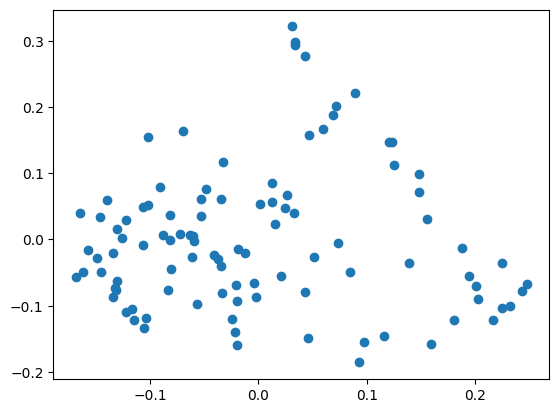

In [38]:
# plot pca of embeddings
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
emb = pca.fit_transform(np.stack(emb_df.embedding))

plt.scatter(emb[:, 0], emb[:, 1])
plt.show()